# Customer_Credit_Risk_Prediction

## PROJECT GOAL


L'objective de ce projet de machine learning de données classe les personnes décrites par un ensemble d'attributs en tant que bons ou mauvais risques de crédit, cela signifie que l'ensemble de données contient des informations sur les individus, telles que leur historique financier, leur revenu et leurs dettes, et utilise ces informations pour les catégoriser en tant que bons ou mauvais risques de crédit.

Être classé en tant que bon risque de crédit signifie qu'un individu est considéré comme plus susceptible de rembourser ses dettes à temps et en totalité, en se basant sur son historique financier et sa situation actuelle. Cela peut rendre plus probable l'approbation de ses demandes de prêts ou d'autres formes de crédit, et peut également conduire à des taux d'intérêt et des modalités de remboursement plus favorables.

D'autre part, être classé en tant que mauvais risque de crédit signifie qu'un individu est considéré comme moins susceptible de rembourser ses dettes à temps et en totalité, en se basant sur son historique financier et sa situation actuelle. Cela peut rendre moins probable l'approbation de ses demandes de prêts ou d'autres formes de crédit, et peut également conduire à des taux d'intérêt plus élevés et à des modalités de remboursement moins favorables.

En résumé, la classification des individus en tant que bons ou mauvais risques de crédit est une tâche importante pour les institutions financières afin de prendre des décisions éclairées sur l'octroi de prêts et la gestion des risques.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('/credit_customers.csv')
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [9]:
df['employment'].unique()

array(['>=7', '1<=X<4', '4<=X<7', 'unemployed', '<1'], dtype=object)

In [10]:
df=df.replace(">=7","superieurouegale7")
df=df.replace("1<=X<4","entre1et4")
df=df.replace("4<=X<7","entre4et7")
df=df.replace("<1","inferieura1")
df['employment'].unique()
df=df.replace("none","donthave")
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,superieurouegale7,4.0,male single,donthave,4.0,real estate,67.0,donthave,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,entre1et4,2.0,female div/dep/mar,donthave,2.0,real estate,22.0,donthave,own,1.0,skilled,1.0,donthave,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,entre4et7,2.0,male single,donthave,3.0,real estate,49.0,donthave,own,1.0,unskilled resident,2.0,donthave,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,entre4et7,2.0,male single,guarantor,4.0,life insurance,45.0,donthave,for free,1.0,skilled,2.0,donthave,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,entre1et4,3.0,male single,donthave,4.0,no known property,53.0,donthave,for free,2.0,skilled,2.0,donthave,yes,bad


In [11]:
df['credit_history'].unique()

array(['critical/other existing credit', 'existing paid',
       'delayed previously', 'no credits/all paid', 'all paid'],
      dtype=object)

In [12]:
df=df.replace("critical/other existing credit","criticalorother existing credit")
df=df.replace("no credits/all paid","no creditsorall paid")
df['credit_history'].unique()

array(['criticalorother existing credit', 'existing paid',
       'delayed previously', 'no creditsorall paid', 'all paid'],
      dtype=object)

In [13]:
df['checking_status'].unique()

array(['<0', '0<=X<200', 'no checking', '>=200'], dtype=object)

In [14]:
df=df.replace("<0","negative")
df=df.replace("0<=X<200","postiftinfedeuxcents")
df=df.replace(">=200","supdeuxcent")
df['checking_status'].unique()

array(['negative', 'postiftinfedeuxcents', 'no checking', 'supdeuxcent'],
      dtype=object)

In [15]:
df['savings_status'].unique()

array(['no known savings', '<100', '500<=X<1000', '>=1000', '100<=X<500'],
      dtype=object)

In [16]:
df=df.replace("<100","inferieuracent")
df=df.replace("500<=X<1000","entrecentetcinqcent")
df=df.replace(">=1000","superieuramille")
df=df.replace("100<=X<500","entre100et500")
df['savings_status'].unique()

array(['no known savings', 'inferieuracent', 'entrecentetcinqcent',
       'superieuramille', 'entre100et500'], dtype=object)

In [17]:
df['job'].unique()

array(['skilled', 'unskilled resident', 'high qualif/self emp/mgmt',
       'unemp/unskilled non res'], dtype=object)

In [18]:
df=df.replace("high qualif/self emp/mgmt","high_qualifself emp_mgmt")
df=df.replace("unemp/unskilled non res","unemp_unskilled_non_res")
df['job'].unique()

array(['skilled', 'unskilled resident', 'high_qualifself emp_mgmt',
       'unemp_unskilled_non_res'], dtype=object)

In [19]:
df['purpose'].unique()

array(['radio/tv', 'education', 'furniture/equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [20]:
df=df.replace("radio/tv","radio_tv")
df=df.replace("furniture/equipment","furniture_equipment")
df['purpose'].unique()

array(['radio_tv', 'education', 'furniture_equipment', 'new car',
       'used car', 'business', 'domestic appliance', 'repairs', 'other',
       'retraining'], dtype=object)

In [21]:
df['personal_status'].unique()

array(['male single', 'female div/dep/mar', 'male div/sep',
       'male mar/wid'], dtype=object)

In [22]:
df=df.replace("female div/dep/mar","female divordepormar")
df=df.replace("male div/sep","maleordiv_sep")
df=df.replace("male mar/wid","maleormar_wid")
df['personal_status'].unique()

array(['male single', 'female divordepormar', 'maleordiv_sep',
       'maleormar_wid'], dtype=object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [24]:
df.duplicated().sum()

0

In [25]:
df.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

 Rapport: Il ya 21 colonnes et 1000 lignes  dont 7 d'entre eux de type  float.
          Il n'ya pas de NA valeurs
          Il ya des variables numerisques (Float) et Object
          Il n'ya pas des doublons de lignes 

In [26]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_commitment,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
existing_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependents,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [27]:
df.select_dtypes(include='object').nunique() 

checking_status         4
credit_history          5
purpose                10
savings_status          5
employment              5
personal_status         4
other_parties           3
property_magnitude      4
other_payment_plans     3
housing                 3
job                     4
own_telephone           2
foreign_worker          2
class                   2
dtype: int64

# Exploratory Data Analysis

## Univariante Analysis 

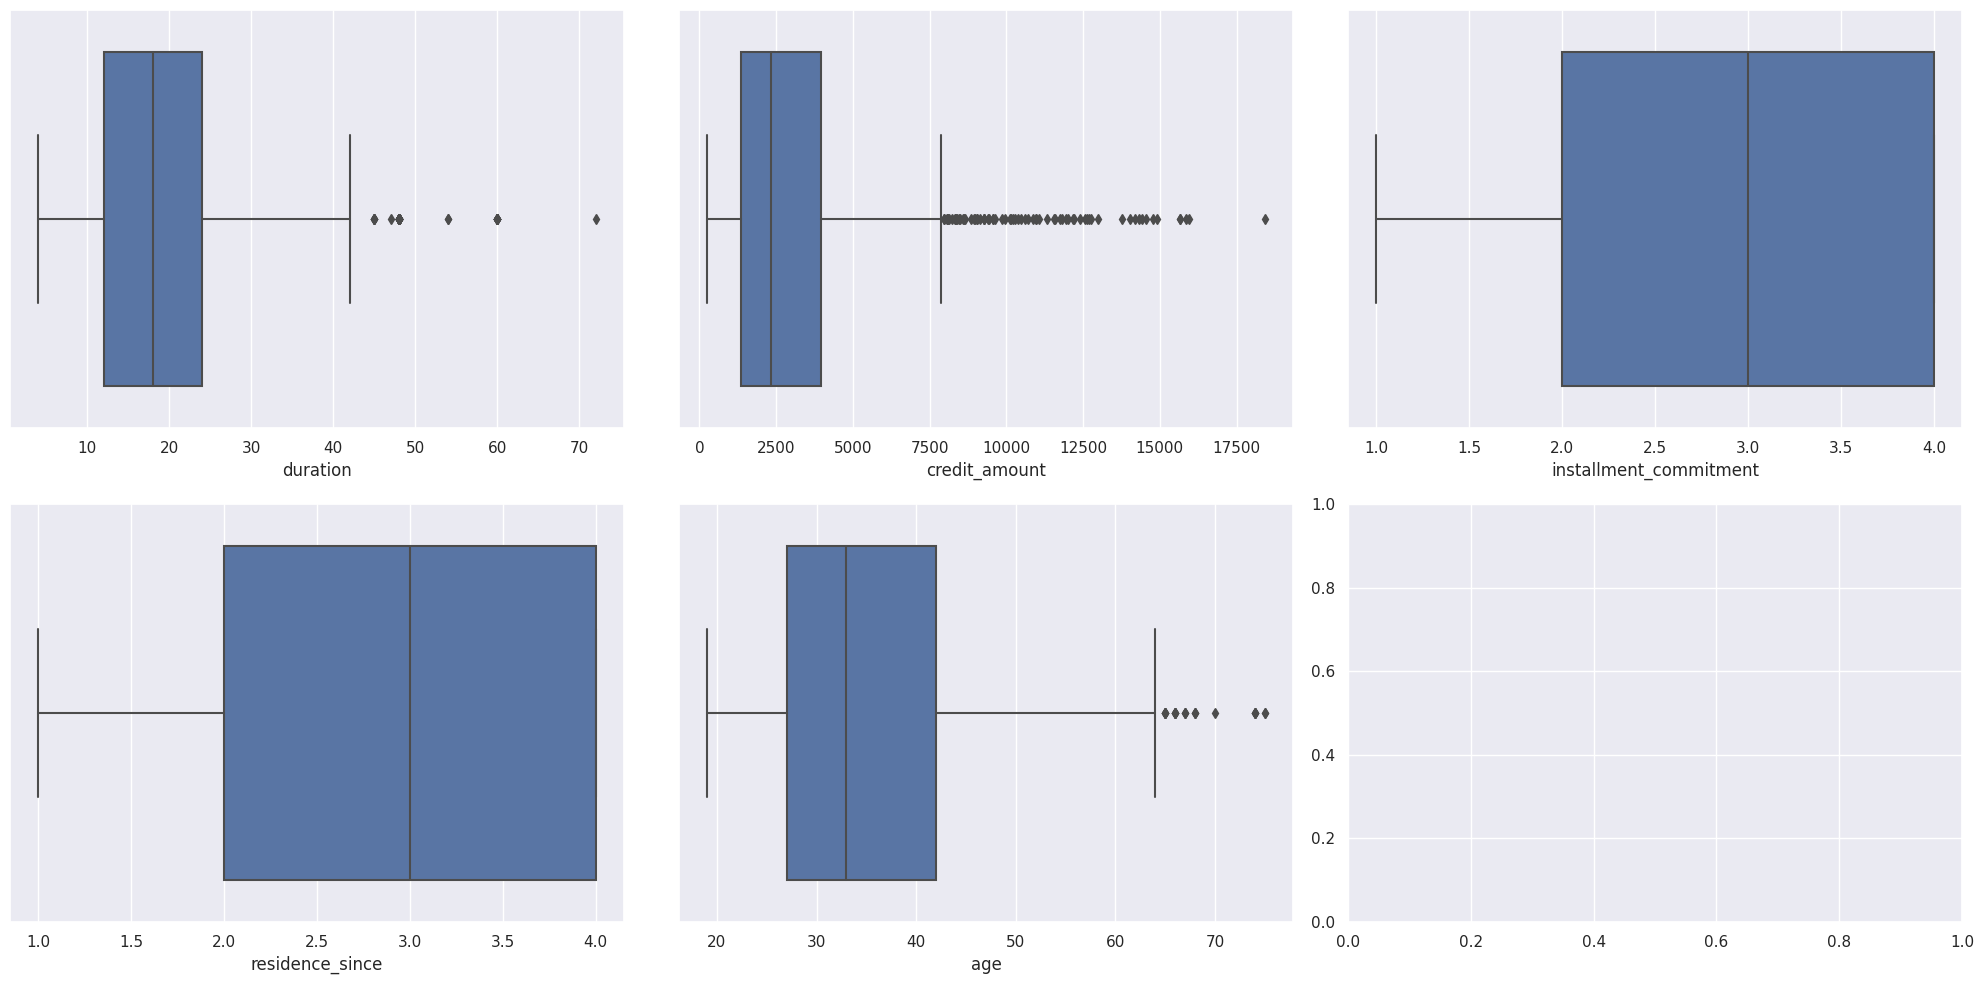

In [28]:
#nummerical variables 
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

Rapport :
les variables duration,credit_amount , et age contient des outliers 


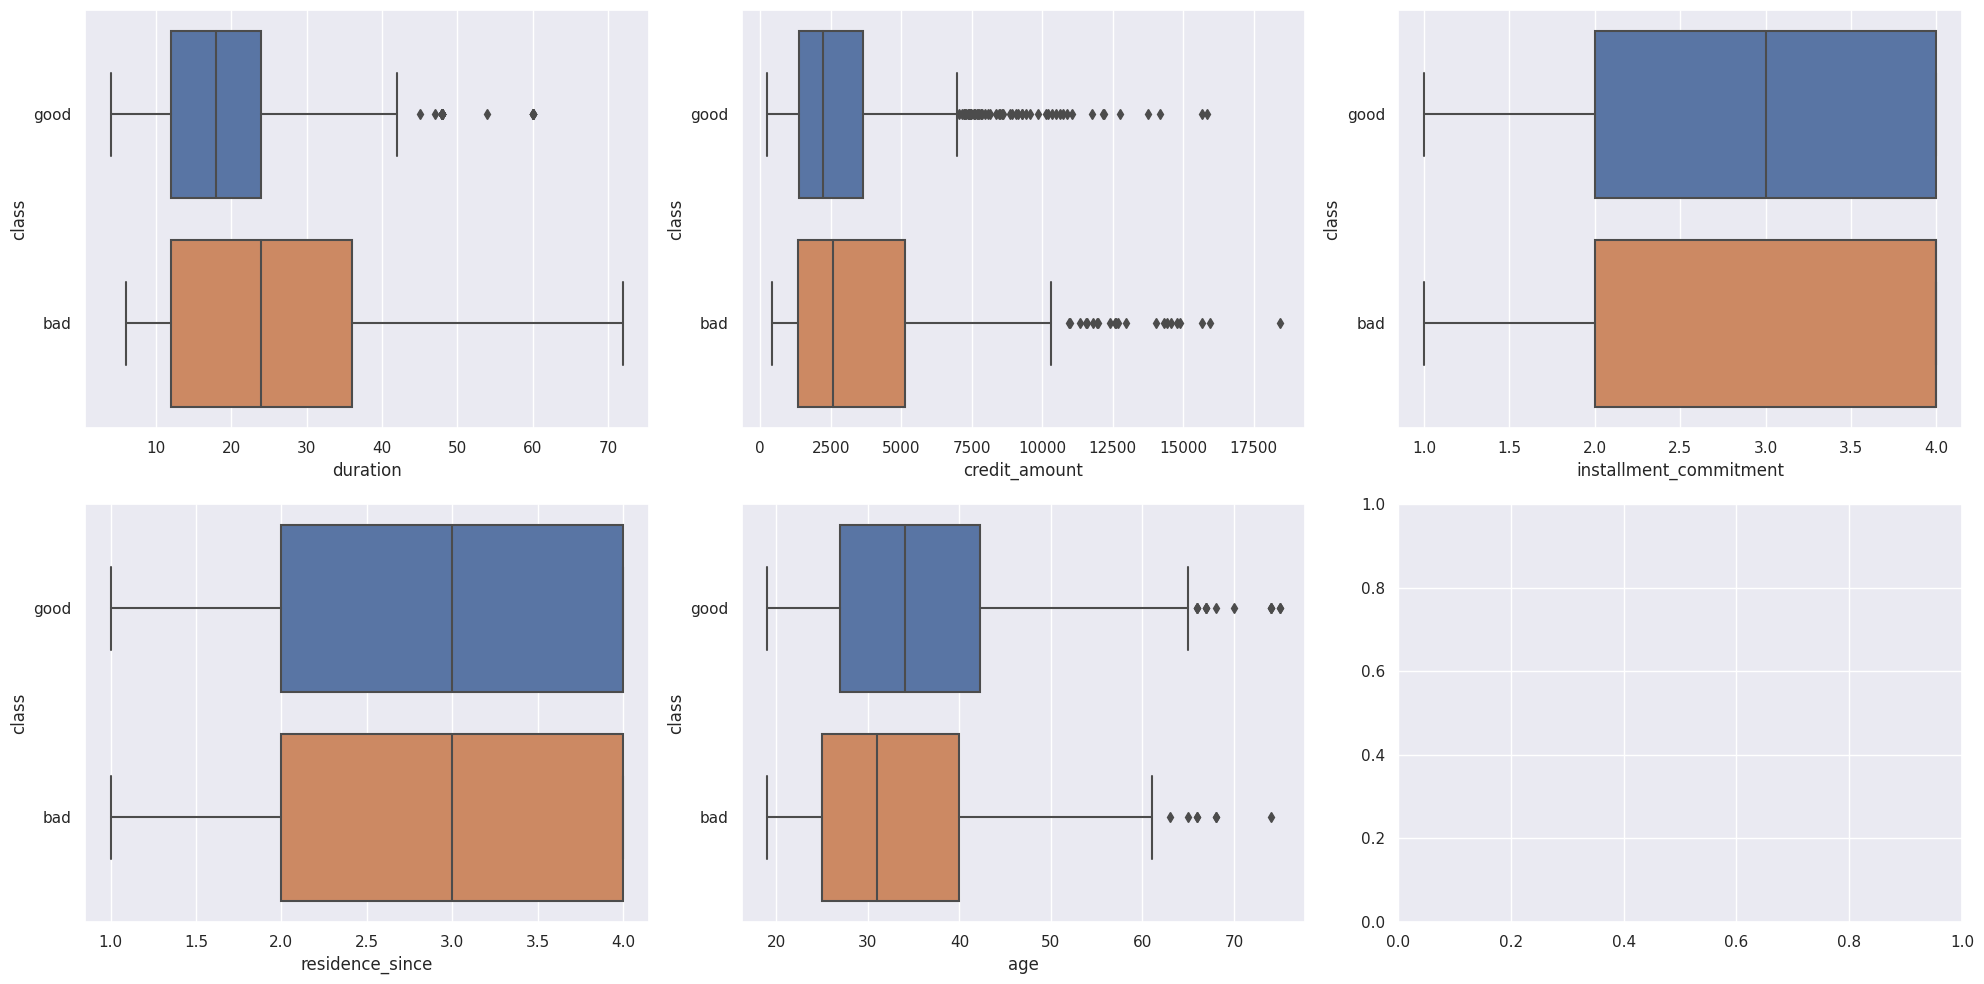

In [29]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, y='class', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

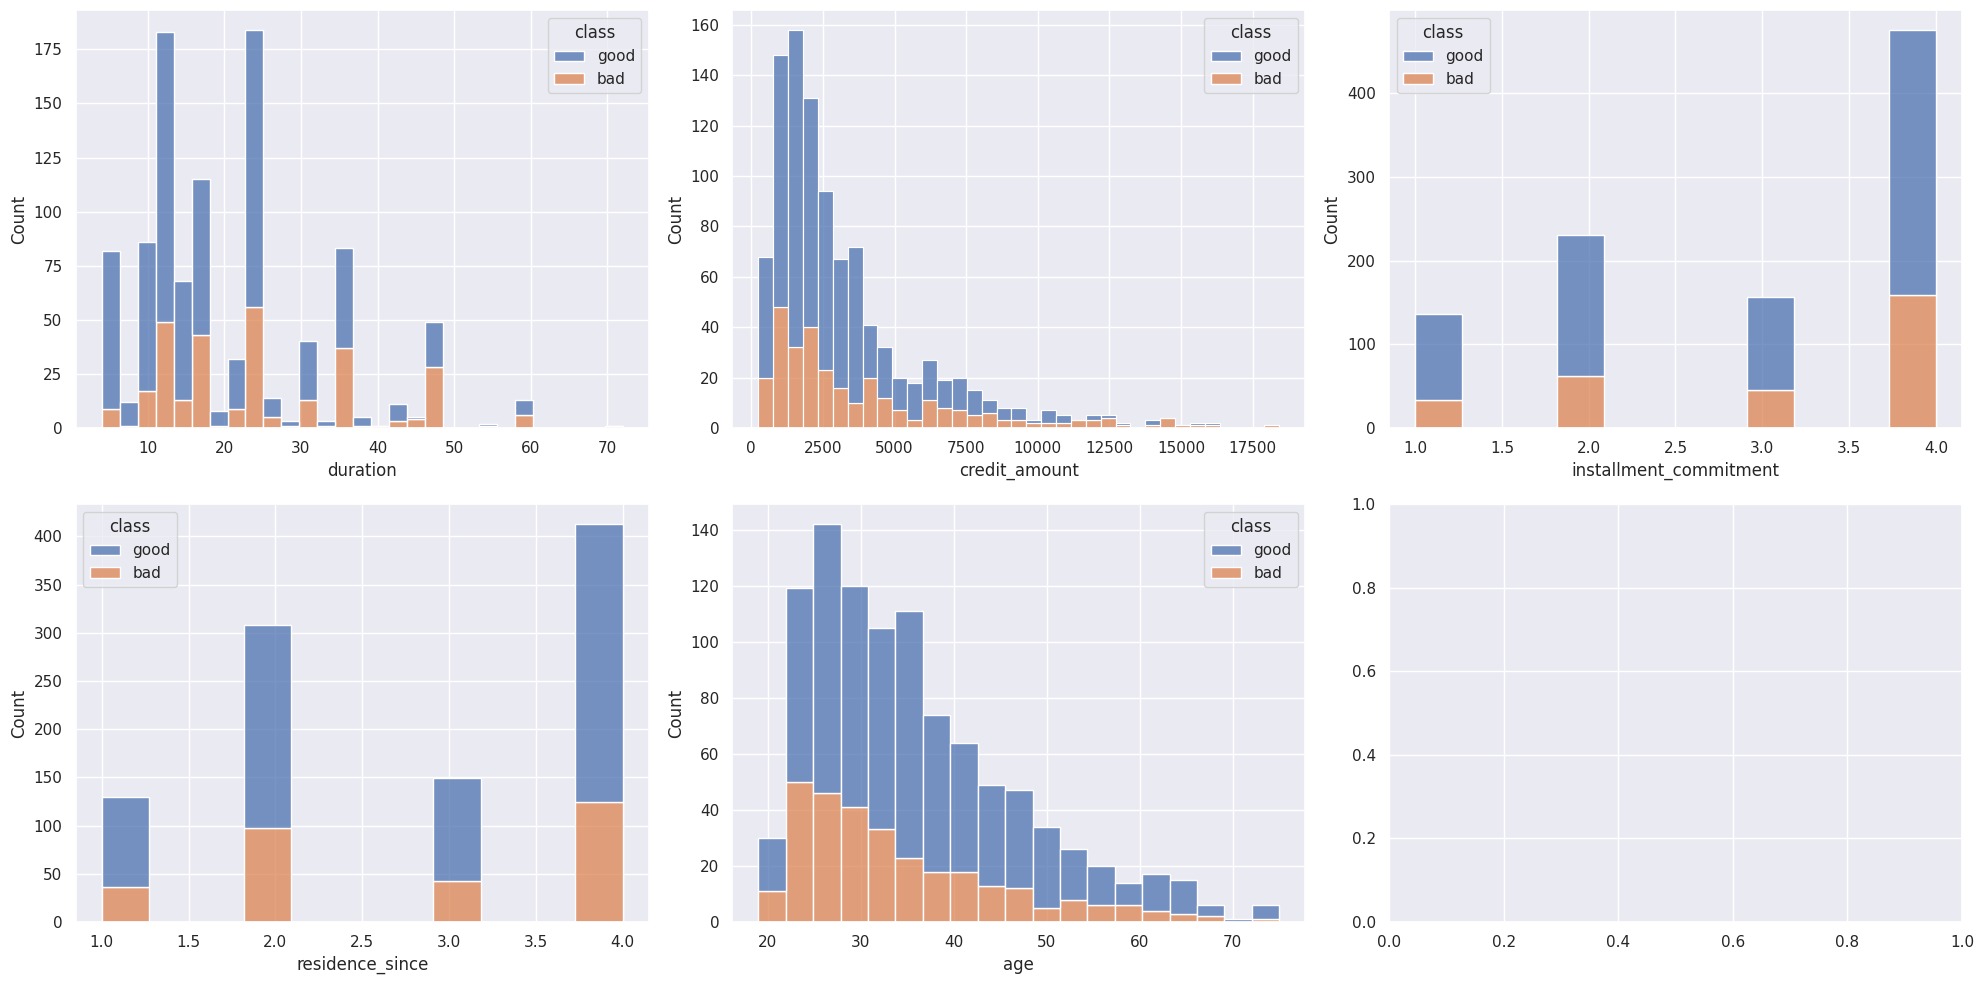

In [30]:

num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple="stack")

fig.tight_layout()

plt.show()

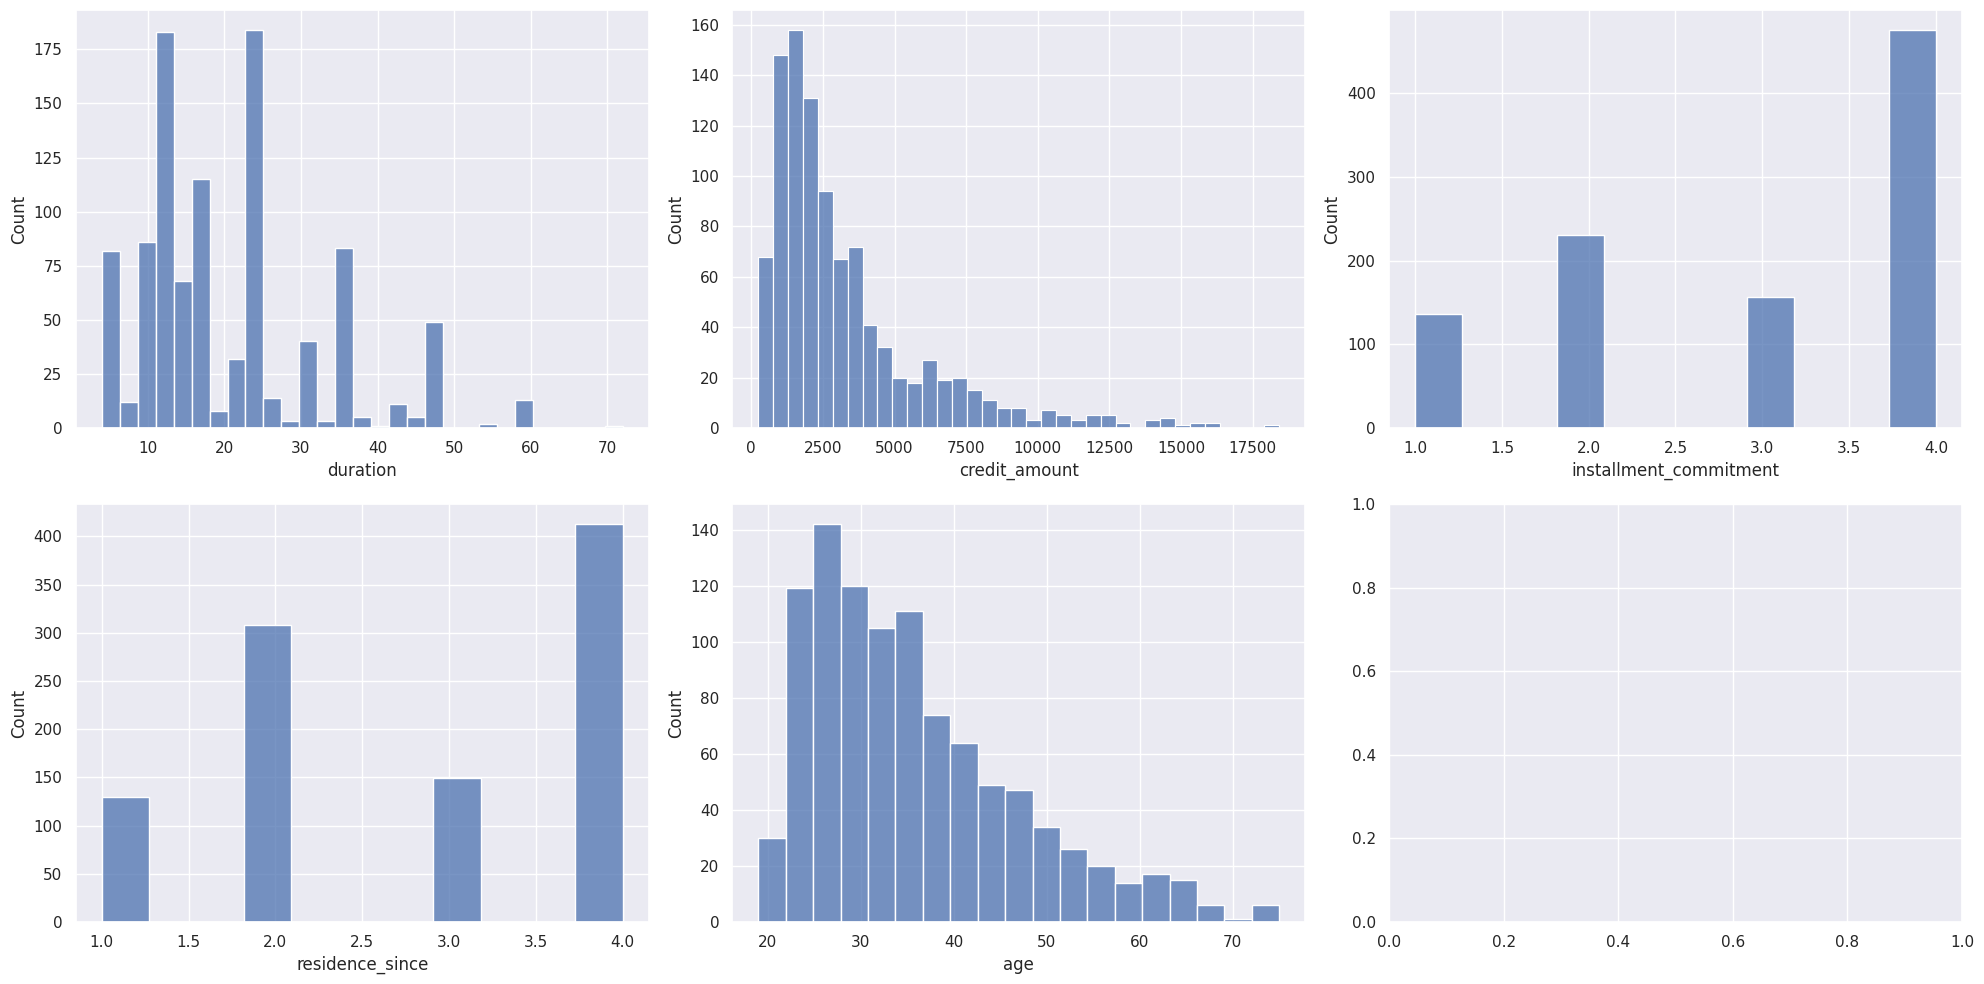

In [31]:
num_vars = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

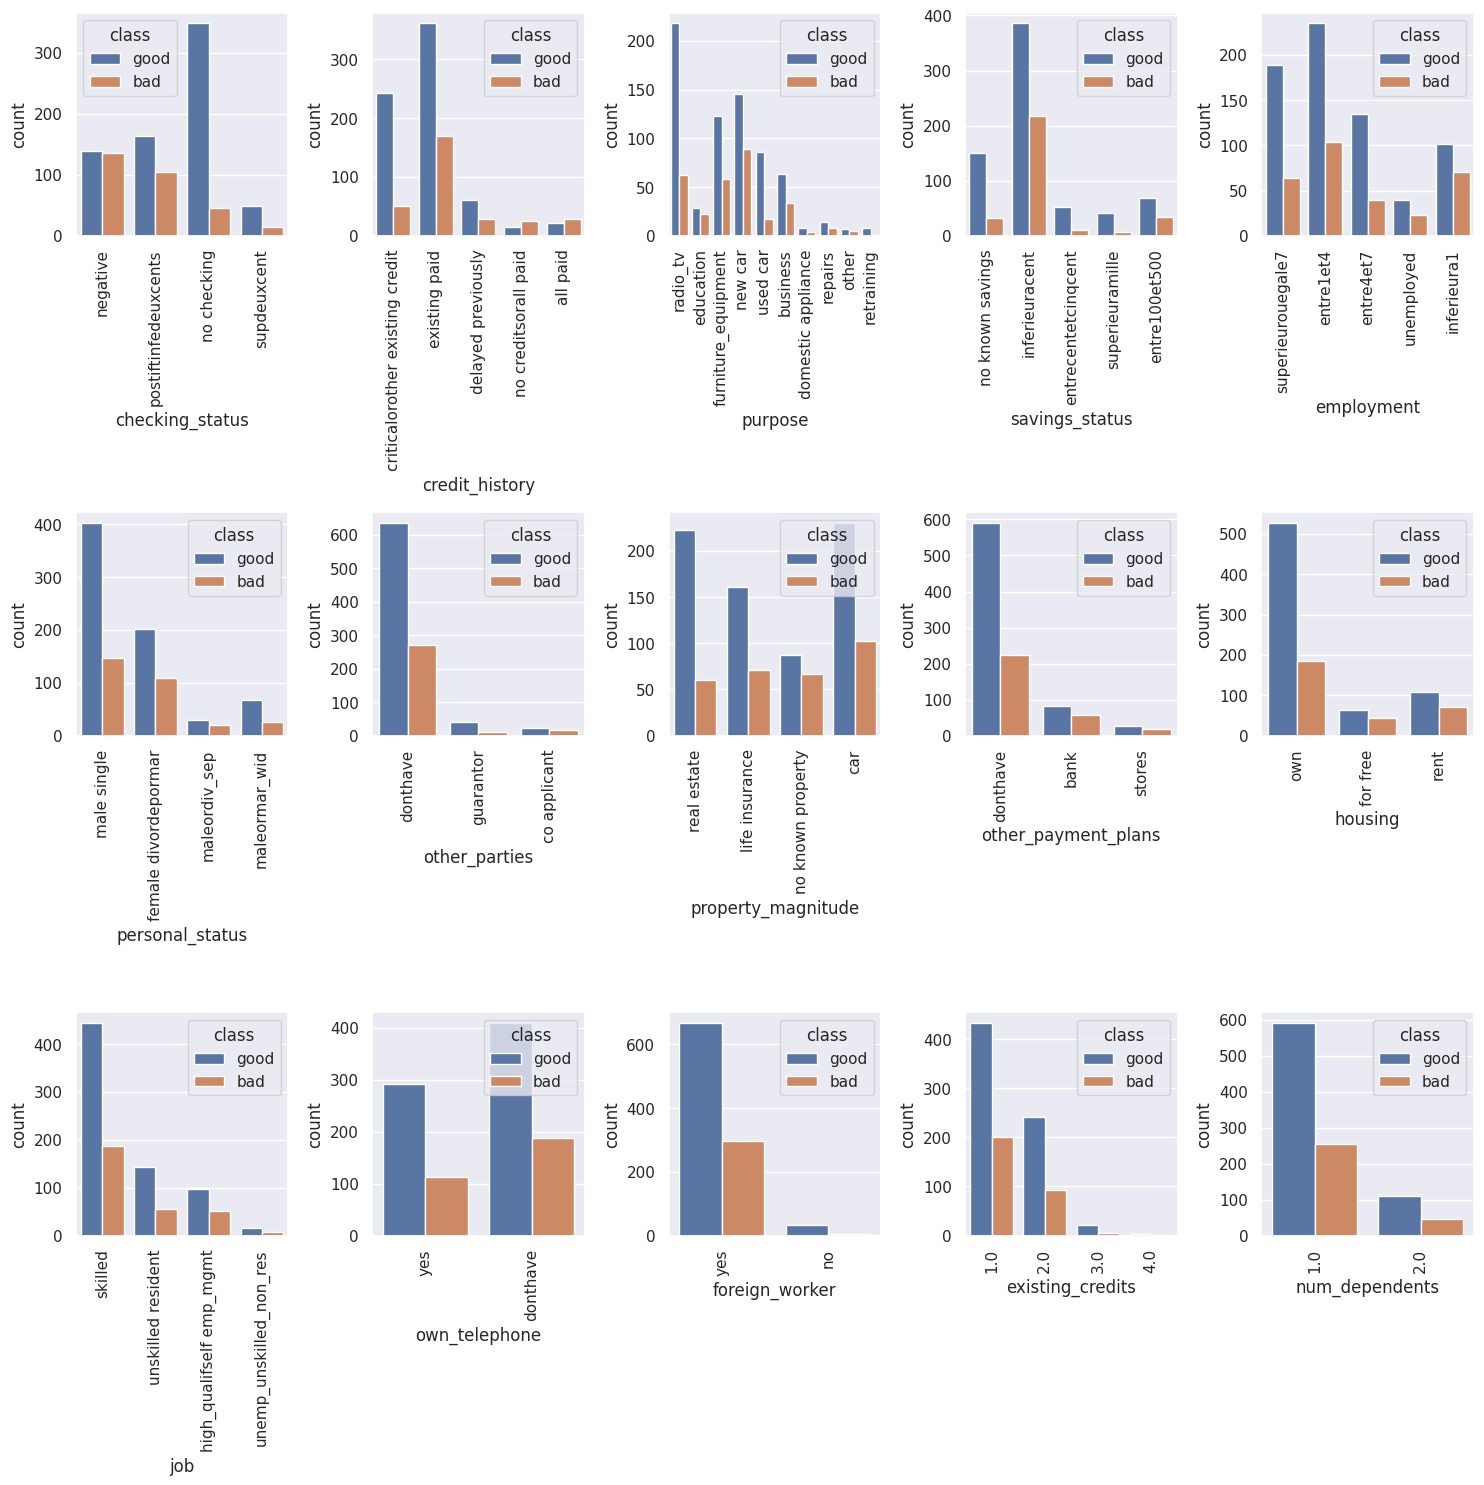

In [32]:
# list of categorical variables to plot 
cat_vars = ['checking_status', 'credit_history','purpose', 'savings_status', 'employment',
            'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 
            'job', 'own_telephone', 'foreign_worker','existing_credits','num_dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15, 15))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='class', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

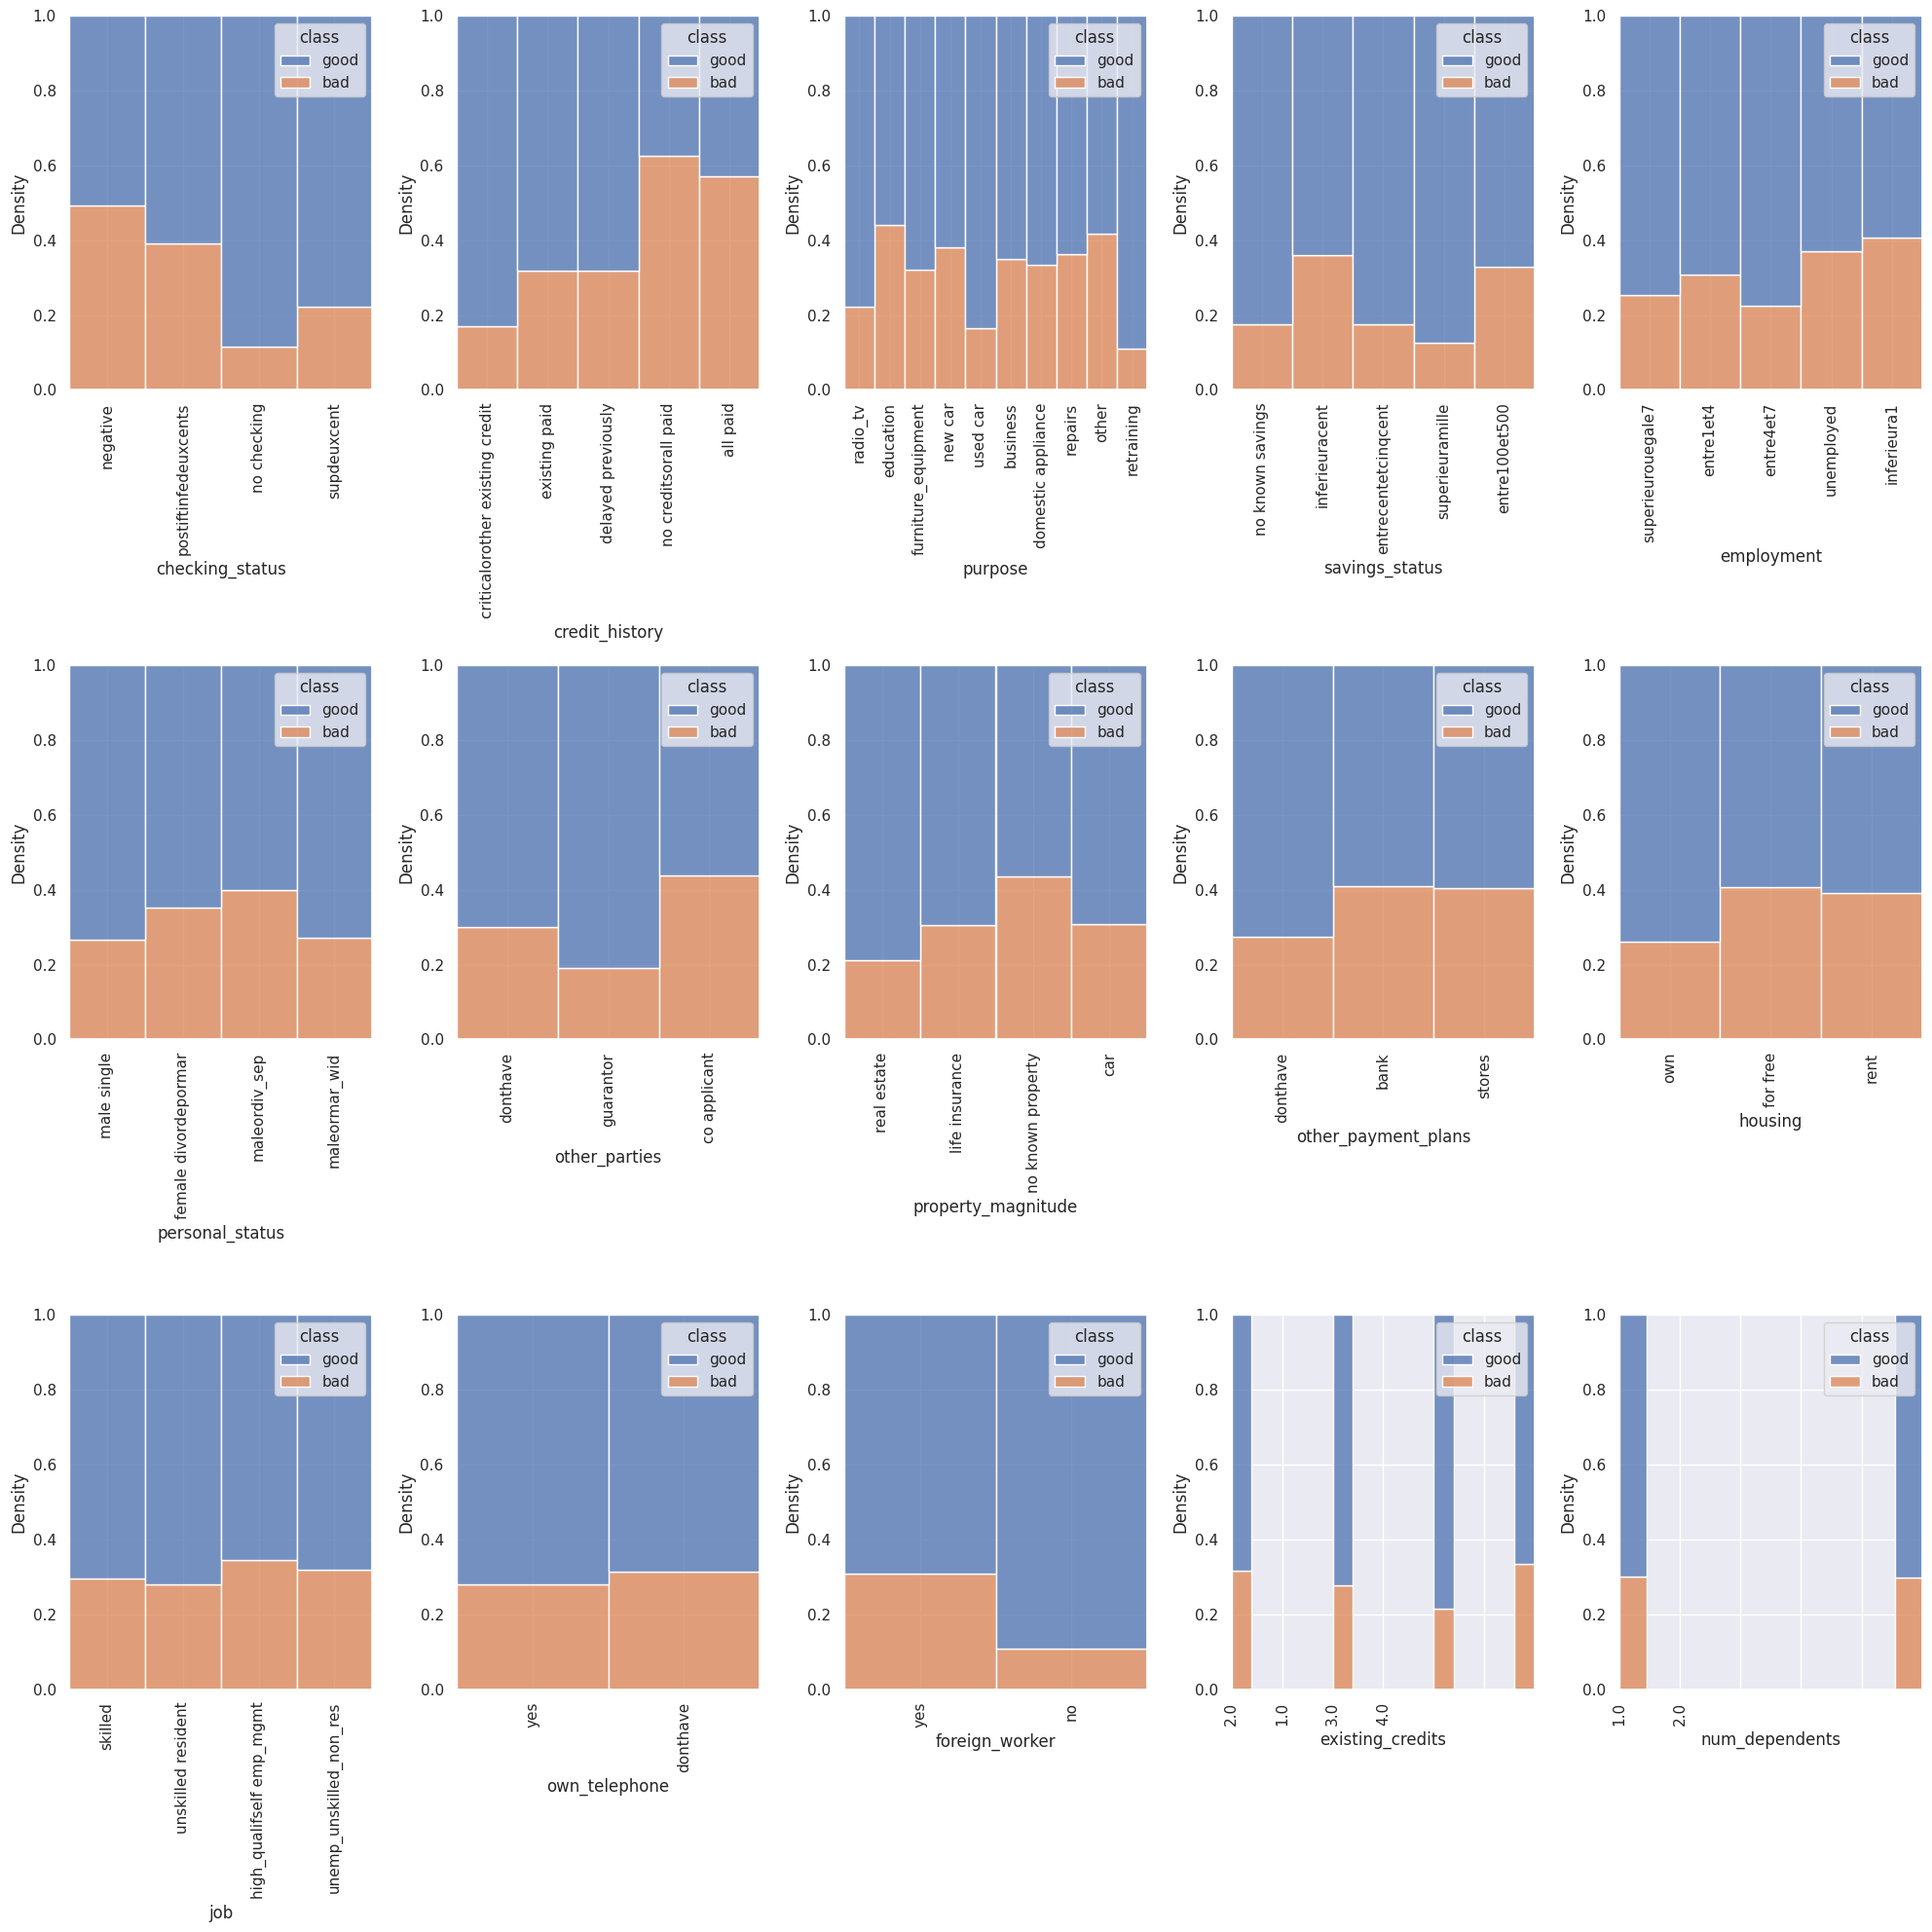

In [33]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['checking_status', 'credit_history','purpose', 'savings_status', 'employment',
            'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 
            'job', 'own_telephone', 'foreign_worker','existing_credits','num_dependents']

# create figure with subplots
fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))
axs = axs.flatten()

# create histplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.histplot(x=var, hue='class', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat='density')
    axs[i].set_xticklabels(df[var].unique(), rotation=90)
    axs[i].set_xlabel(var)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

# Feature Selection
SelectKBest selects the top k features in a dataset based on statistical tests such as chi-squared, ANOVA F-test, or mutual information. This method is commonly used in machine learning to improve model accuracy by reducing the dimensionality of the feature space. The method ranks the features using statistical tests and selects the top k features with the highest scores.
Our approach will involve selecting the top categorical feature using the chi2 test, followed by selecting numerical features using f_regression.

In [34]:
from scipy.stats import chi2_contingency

significant_vars = []

for col in cat_vars:
    cont_table = pd.crosstab(df[col], df['class'])
    chi2, p, dof, expected = chi2_contingency(cont_table)
    
    if p < 0.05:
        significant_vars.append(col)

print("Significant variables:", significant_vars)

Significant variables: ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'foreign_worker']


In [35]:
y=df['class']
lista=['credit_history','checking_status', 'savings_status', 'employment','job','purpose', 'personal_status',]
cat_vars = [  'credit_history','checking_status', 'savings_status', 'employment','job','purpose', 'personal_status','property_magnitude', 'other_payment_plans', 'housing', 
             'own_telephone', 'foreign_worker']

# Storing explicative variables 
X= df.drop(columns=['class'],axis=1)
 
cat = X[cat_vars]
cat

,credit_history,checking_status,savings_status,employment,job,purpose,personal_status,property_magnitude,other_payment_plans,housing,own_telephone,foreign_worker
0,criticalorother existing credit,negative,no known savings,superieurouegale7,skilled,radio_tv,male single,real estate,donthave,own,yes,yes
1,existing paid,postiftinfedeuxcents,inferieuracent,entre1et4,skilled,radio_tv,female divordepormar,real estate,donthave,own,donthave,yes
2,criticalorother existing credit,no checking,inferieuracent,entre4et7,unskilled resident,education,male single,real estate,donthave,own,donthave,yes
3,existing paid,negative,inferieuracent,entre4et7,skilled,furniture_equipment,male single,life insurance,donthave,for free,donthave,yes
4,delayed previously,negative,inferieuracent,entre1et4,skilled,new car,male single,no known property,donthave,for free,donthave,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
995,existing paid,no checking,inferieuracent,entre4et7,unskilled resident,furniture_equipment,female divordepormar,real estate,donthave,own,donthave,yes
996,existing paid,negative,inferieuracent,entre1et4,high_qualifself emp_mgmt,used car,maleordiv_sep,life insurance,donthave,own,yes,yes
997,existing paid,no checking,inferieuracent,superieurouegale7,skilled,radio_tv,male single,car,donthave,own,donthave,yes
998,existing paid,negative,inferieuracent,entre1et4,skilled,radio_tv,male single,no known property,donthave,for free,yes,yes


### create dummy variables for categorical variables in order to do chi2 test using SelectKbest 

In [36]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

checking_status: [0 2 1 3]
credit_history: [1 3 2 4 0]
purpose: [6 2 3 4 9 0 1 7 5 8]
savings_status: [3 2 1 4 0]
employment: [3 0 1 4 2]
personal_status: [1 0 2 3]
other_parties: [1 2 0]
property_magnitude: [3 1 2 0]
other_payment_plans: [1 0 2]
housing: [1 0 2]
job: [1 3 0 2]
own_telephone: [1 0]
foreign_worker: [1 0]
class: [1 0]


In [37]:
y=df['class']
cat_vars = ['credit_history','credit_history','checking_status', 'savings_status', 'employment','job','purpose', 'personal_status','property_magnitude', 'other_payment_plans', 'housing', 
             'own_telephone', 'foreign_worker']

# Storing explicative variables 
X= df.drop(columns=['class'],axis=1)
 
cat = df[cat_vars]

In [38]:
# split into input (X) and output (y) variables
X = df[cat_vars]
y = np.array(df['class']).reshape(-1,1)
 # format all fields as string
X = X.astype(str)
X

,credit_history,credit_history,checking_status,savings_status,employment,job,purpose,personal_status,property_magnitude,other_payment_plans,housing,own_telephone,foreign_worker
0,1,1,0,3,3,1,6,1,3,1,1,1,1
1,3,3,2,2,0,1,6,0,3,1,1,0,1
2,1,1,1,2,1,3,2,1,3,1,1,0,1
3,3,3,0,2,1,1,3,1,1,1,0,0,1
4,2,2,0,2,0,1,4,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,1,2,1,3,3,0,3,1,1,0,1
996,3,3,0,2,0,0,9,2,1,1,1,1,1
997,3,3,1,2,3,1,6,1,0,1,1,0,1
998,3,3,0,2,0,1,6,1,2,1,0,1,1


Index(['credit_history', 'credit_history', 'checking_status', 'savings_status',
       'employment', 'job', 'purpose', 'personal_status', 'property_magnitude',
       'other_payment_plans', 'housing', 'own_telephone', 'foreign_worker'],
      dtype='object')


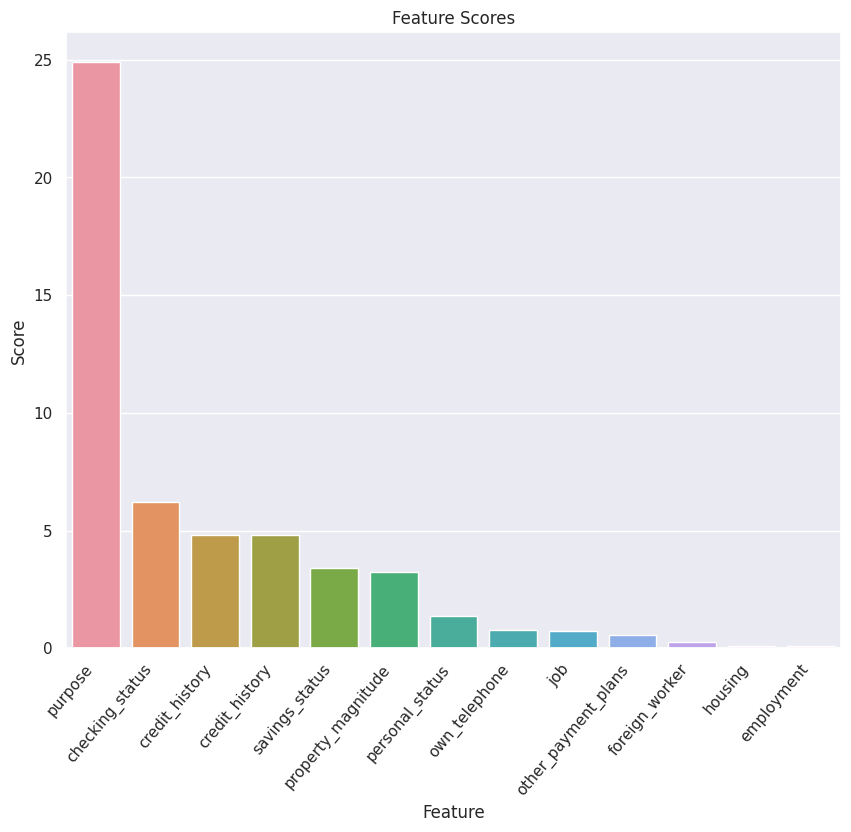

In [39]:
y=df['class']
cat_vars = ['credit_history','credit_history','checking_status', 'savings_status', 'employment','job','purpose', 'personal_status','property_magnitude', 'other_payment_plans', 'housing', 
             'own_telephone', 'foreign_worker']

# Storing explicative variables 
X= df.drop(columns=['class'],axis=1)
 
cat = df[cat_vars]

from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k='all')
X_new = selector.fit_transform(cat, y)

selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = cat.columns[selected_features_indices]

# print the selected feature names
print(selected_features_names)

# get the scores of all features
feature_scores = selector.scores_

# get the indices of the features sorted by their scores
sorted_feature_indices = feature_scores.argsort()[::-1]

# get the names of the sorted features
sorted_feature_names = cat.columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})

# plot the feature scores
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(x='Feature', y='Score', data=feature_scores_df, order=sorted_feature_names, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')

plt.show()

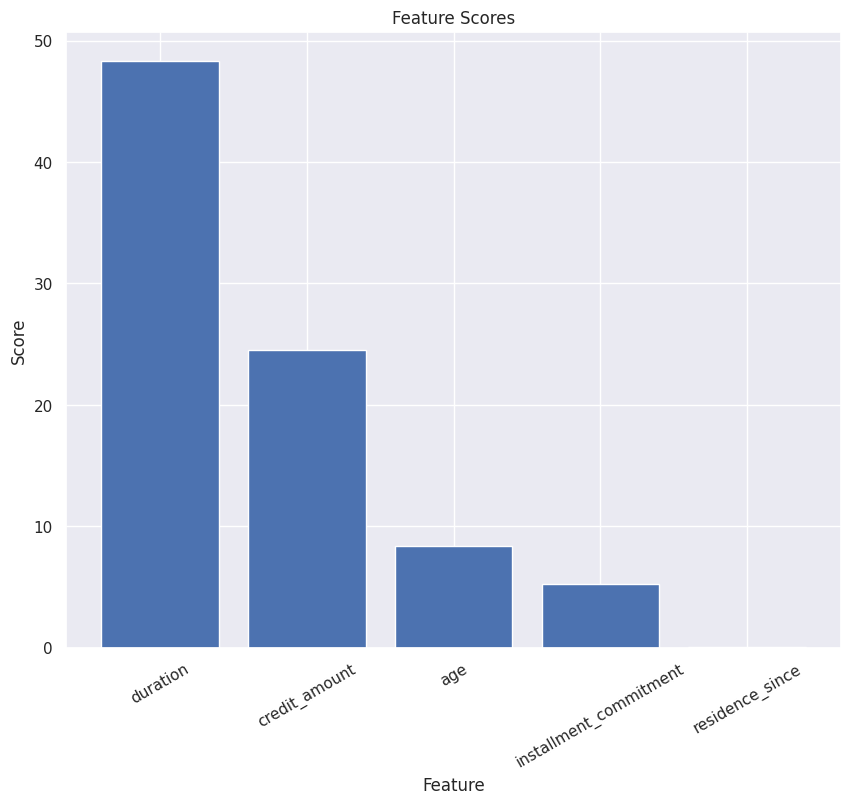

In [40]:
from sklearn.feature_selection import f_regression

num=X[num_vars]
selector = SelectKBest(f_regression, k=2)
X_new = selector.fit_transform(num, y)

selected_features_indices = selector.get_support(indices=True)

# get the names of the selected features
selected_features_names = num.columns[selected_features_indices]

# print the selected feature names
# get the scores of all features
feature_scores = selector.scores_

# get the indices of the features sorted by their scores
sorted_feature_indices = feature_scores.argsort()[::-1]

# get the names of the sorted features
sorted_feature_names = num.columns[sorted_feature_indices]
feature_scores_df = pd.DataFrame({'Feature': sorted_feature_names, 'Score': feature_scores[sorted_feature_indices]})


fig, ax = plt.subplots(figsize=(10, 8))

ax.bar(range(len(feature_scores)), feature_scores[sorted_feature_indices])
ax.set_xticks(range(len(feature_scores)))
ax.set_xticklabels(sorted_feature_names, rotation=30)
ax.set_xlabel('Feature')
ax.set_ylabel('Score')
ax.set_title('Feature Scores')

plt.show()

on peut supprimer la colonne residence_since

In [41]:
df=df.drop(columns=['residence_since'],axis=1)

<Axes: >

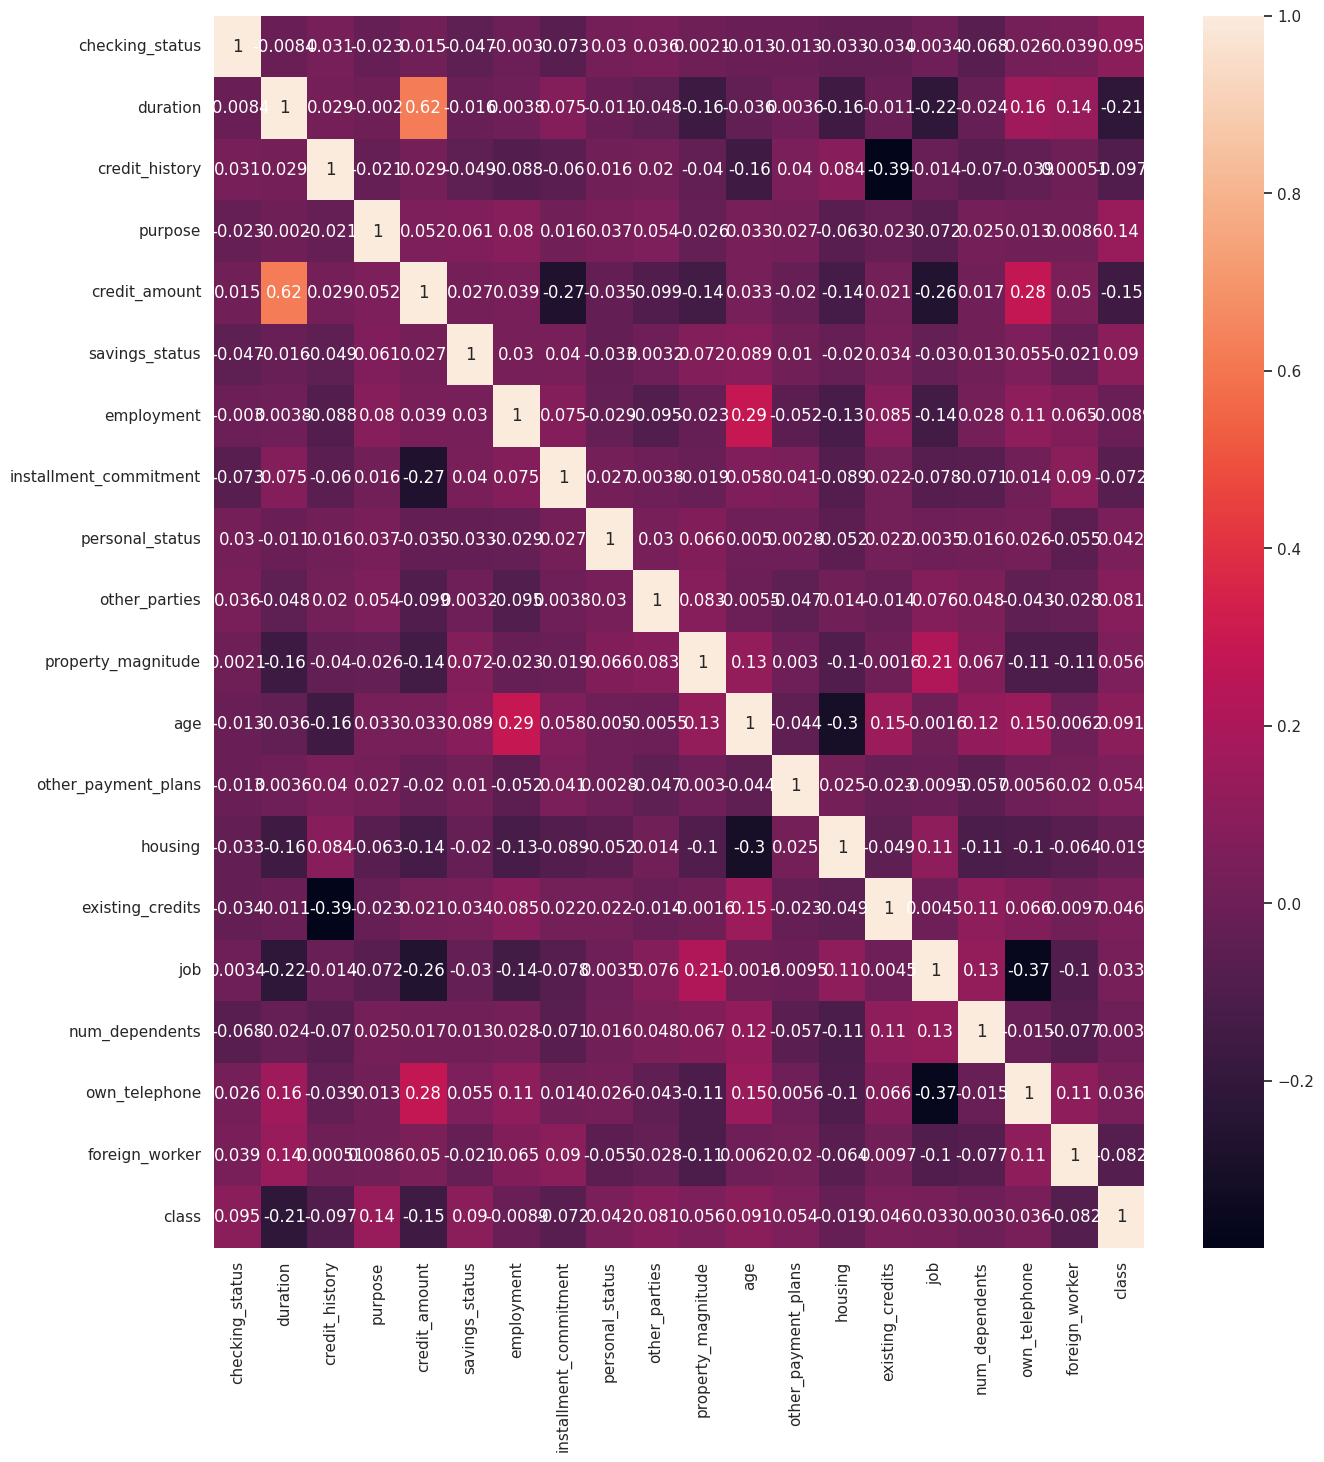

In [42]:
#Correlation Heatmap
plt.figure(figsize=(15, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

all the variables are not really correlated except the duration and credit amount variables 

1    700
0    300
Name: class, dtype: int64

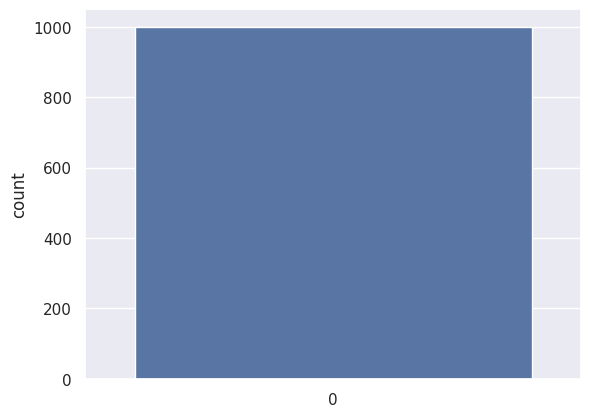

In [43]:
sns.countplot(df['class'])
df['class'].value_counts()

# Data Preprocessing

In [44]:
df.dtypes

checking_status             int64
duration                  float64
credit_history              int64
purpose                     int64
credit_amount             float64
savings_status              int64
employment                  int64
installment_commitment    float64
personal_status             int64
other_parties               int64
property_magnitude          int64
age                       float64
other_payment_plans         int64
housing                     int64
existing_credits          float64
job                         int64
num_dependents            float64
own_telephone               int64
foreign_worker              int64
class                       int64
dtype: object

In [45]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

# Balance the Class Label

1    700
0    300
Name: class, dtype: int64

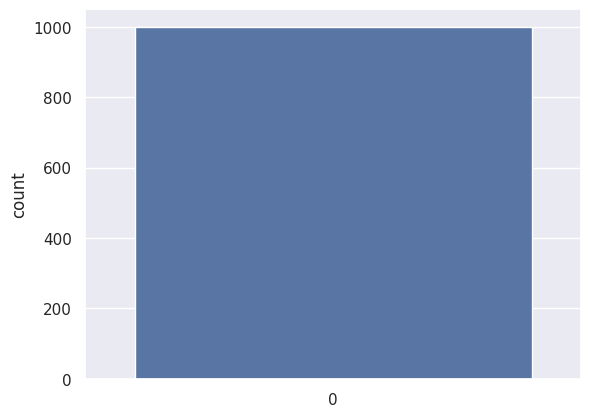

In [46]:
sns.countplot(df['class'])
df['class'].value_counts()

In [47]:
columns=df.columns.tolist()
columns=[c for c in columns if c not in ['class']]
X= df[columns]
y= df['class']

print( X.shape)
print( y.shape)

(1000, 19)
(1000,)


In [48]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Print the class distribution before and after resampling
print("Before resampling:")
print(y_train.value_counts())
print("After resampling:")
print(pd.Series(y_train_resampled).value_counts())

# Train a model on the resampled data
#model.fit(X_train_resampled, y_train_resampled)

# Evaluate the model on the test data
#y_pred = model.predict(X_test)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([X_train_resampled, y_train_resampled],axis=1)
df_upsampled['class'].value_counts()

Before resampling:
1    491
0    209
Name: class, dtype: int64
After resampling:
1    491
0    491
Name: class, dtype: int64


1    491
0    491
Name: class, dtype: int64

In [49]:
X_train_resampled

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,24.0,2,4,2032.0,2,3,4.0,1,1,2,60.0,1,0,2.0,1,1.0,1,1
1,1,12.0,3,4,1884.0,2,3,4.0,1,1,0,39.0,1,1,1.0,0,1.0,1,1
2,0,30.0,3,3,3622.0,4,3,4.0,0,1,1,57.0,1,2,2.0,1,1.0,1,1
3,2,12.0,1,4,958.0,2,1,2.0,1,1,3,47.0,1,1,2.0,3,2.0,0,1
4,1,36.0,1,9,5711.0,4,3,4.0,1,1,0,38.0,1,1,2.0,0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,18.0,3,6,1882.0,2,0,4.0,0,1,0,25.0,0,2,2.0,1,1.0,0,1
978,0,36.0,1,9,9629.0,2,1,4.0,1,1,0,24.0,1,1,2.0,1,1.0,1,1
979,0,12.0,4,4,1082.0,2,0,4.0,1,1,0,48.0,0,1,2.0,1,1.0,0,1
980,0,18.0,3,3,2039.0,2,0,1.0,0,1,3,20.0,0,2,1.0,1,1.0,0,1


1    491
0    491
Name: class, dtype: int64

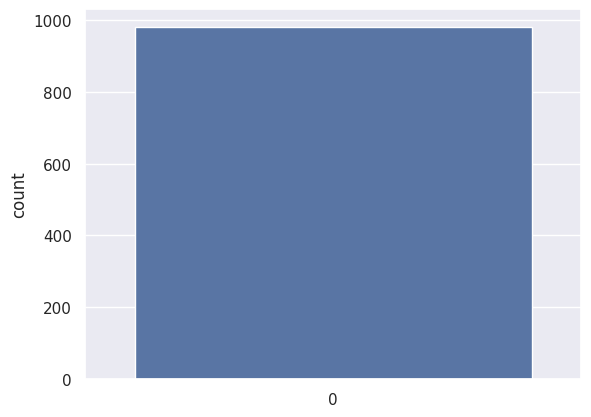

In [50]:
sns.countplot(df_upsampled['class'])
df_upsampled['class'].value_counts()

In [51]:
 y_train_resampled

0      1
1      1
2      1
3      1
4      1
      ..
977    0
978    0
979    0
980    0
981    0
Name: class, Length: 982, dtype: int64

In [52]:
!pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from imblearn import *


# RobustScaler : Dealing with Outliers

In [54]:
#We should perform features scaling with RobustScaler beceause it’s less sensitive to
#outliers .

# Features Scaling with RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(X_train_resampled)
x_test_scaled = scaler.transform(X_test)

# Build Machine Learning Model with Hyperparameter Tuning

# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train_resampled)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [56]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [57]:
!pip install graphviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
from sklearn import metrics
y_pred = dtree.predict(x_test_scaled )
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

NameError: ignored

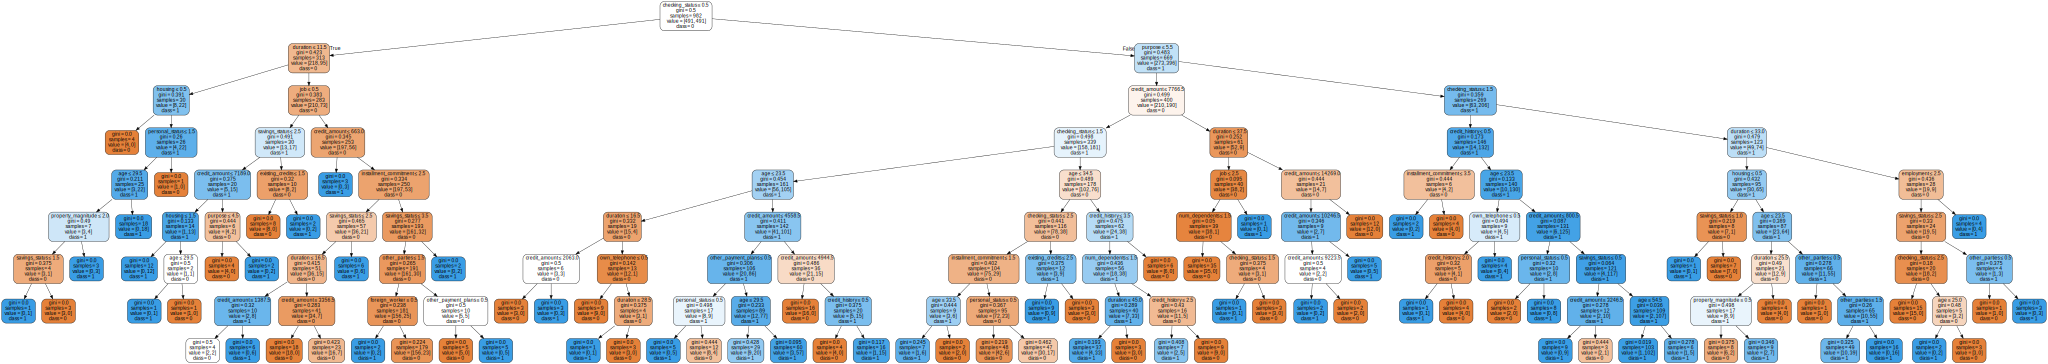

In [59]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree as a dot file
dot_data = export_graphviz(dtree, out_file=None, 
                           feature_names=X_train_resampled.columns,  
                           class_names=['0', '1'],  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Visualize the decision tree using Graphviz
graph = graphviz.Source(dot_data)  
graph

In [60]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.32
Precision Score :  0.32
Recall Score :  0.32
Jaccard Score :  0.19047619047619047
Log Loss :  24.50968430459966


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled )

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}


In [63]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=100)
rfc.fit(X_train_resampled, y_train_resampled )

RandomForestClassifier(max_features='log2', random_state=0)

In [64]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 73.67 %


In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7366666666666667
Precision Score :  0.7366666666666667
Recall Score :  0.7366666666666667
Jaccard Score :  0.58311345646438
Log Loss :  9.491495392467517


# Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(random_state=0)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['liblinear', 'saga']
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(x_train_scaled,y_train_resampled)

# Print the best hyperparameters
print(grid_search.best_params_)

{'penalty': 'l2', 'solver': 'liblinear'}


In [67]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(x_train_scaled,y_train_resampled)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [68]:
import statsmodels.api as sm
import pandas as pd



# create design matrix and target variable
X = df.drop(columns=['class'],axis=1)
y = df['class']

# add intercept term to design matrix
X = sm.add_constant(X)

# fit logistic regression model
model = sm.Logit(y, X).fit()

# print summary of model coefficients
#print(model.summary())

# calculate odds ratios
odds_ratios = np.exp(model.params)
print(odds_ratios)


Optimization terminated successfully.
         Current function value: 0.546534
         Iterations 6
const                     4.687203
checking_status           1.327586
duration                  0.977166
credit_history            0.832361
purpose                   1.143881
credit_amount             0.999888
savings_status            1.230779
employment                0.931605
installment_commitment    0.778664
personal_status           1.066254
other_parties             1.617094
property_magnitude        0.989218
age                       1.017127
other_payment_plans       1.424176
housing                   0.881374
existing_credits          1.076479
job                       0.984460
num_dependents            0.856280
own_telephone             1.470370
foreign_worker            0.294753
dtype: float64


In [69]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 30.33 %


In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.30333333333333334
Precision Score :  0.30333333333333334
Recall Score :  0.30333333333333334
Jaccard Score :  0.1787819253438114
Log Loss :  25.110411861084945


# Confusion Matrix

In [71]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2)
dtree.fit(x_train_scaled,y_train_resampled)
y_pred = dtree.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6433333333333333')

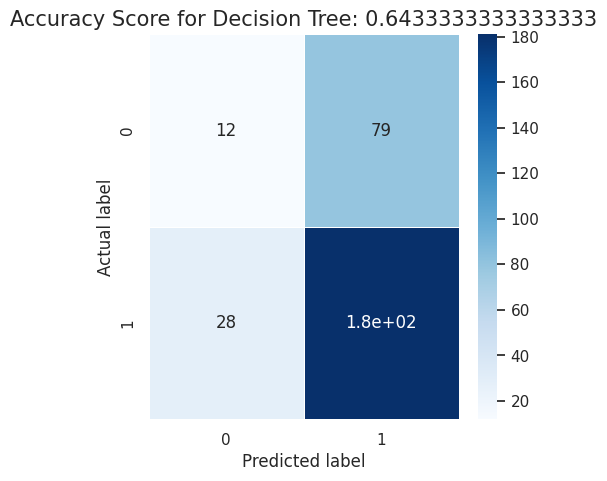

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [73]:
rfc = RandomForestClassifier(random_state=0, max_features='log2', n_estimators=100)
rfc.fit(X_train_resampled, y_train_resampled )
y_pred = rfc.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.7366666666666667')

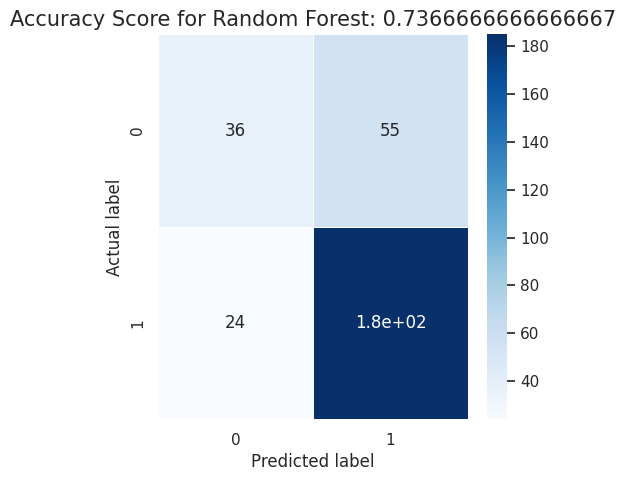

In [74]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

In [75]:
lr = LogisticRegression(random_state=0, solver='liblinear', penalty='l1')
lr.fit(X_train_resampled, y_train_resampled )
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Accuracy Score for Logistic Regression: 0.64')

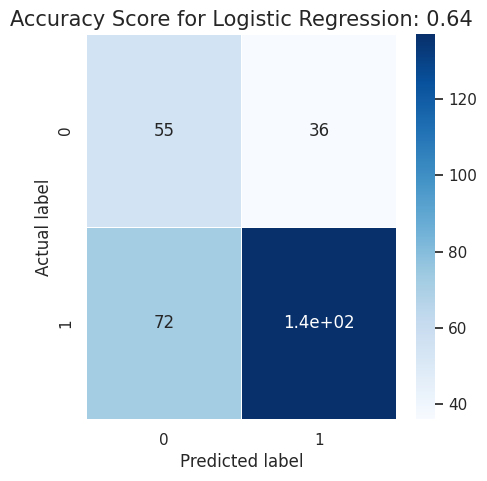

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Logistic Regression: {0}'.format(lr.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

# ROC AUC Curve

# Decision Tree

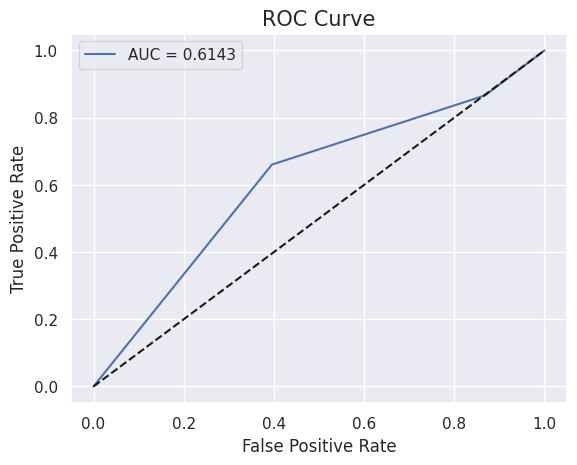

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

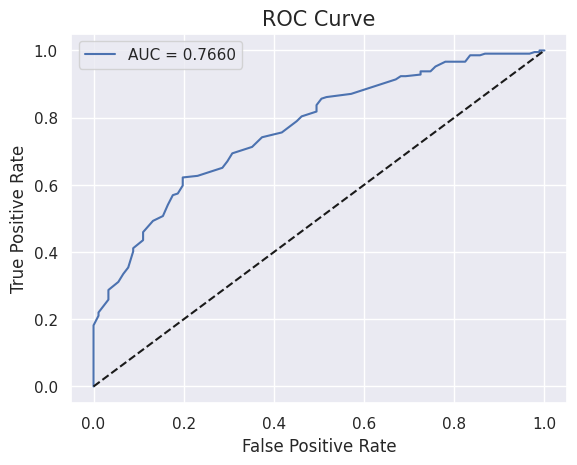

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Logistic Regression

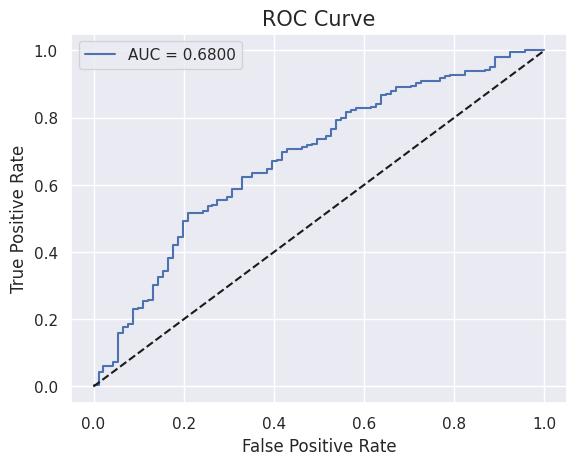

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Feature Importances

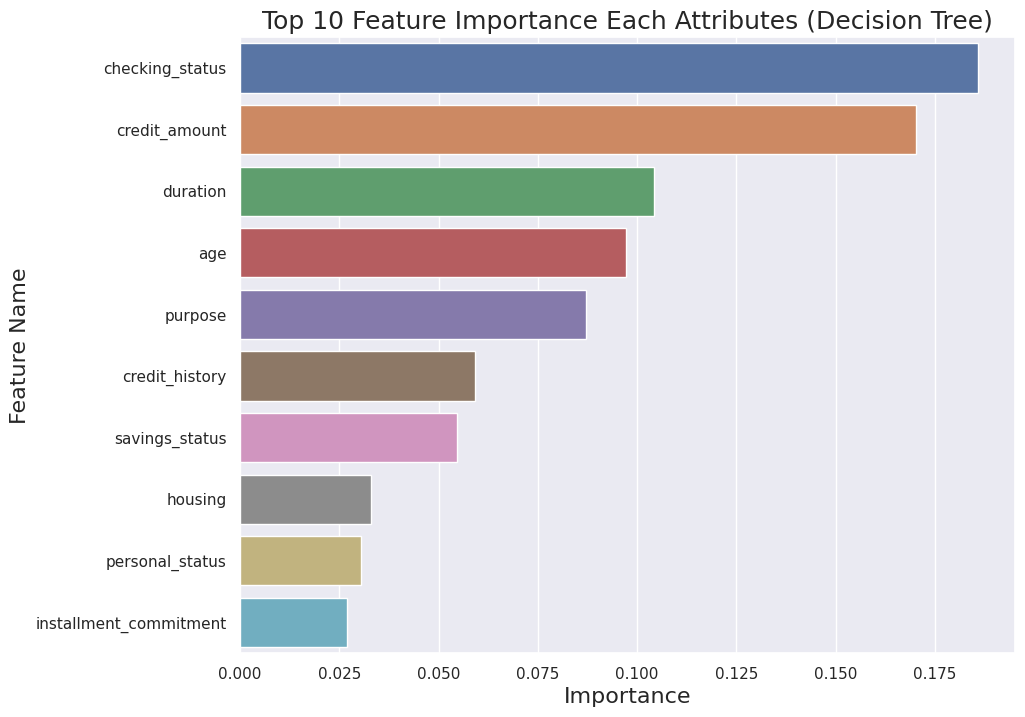

In [80]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

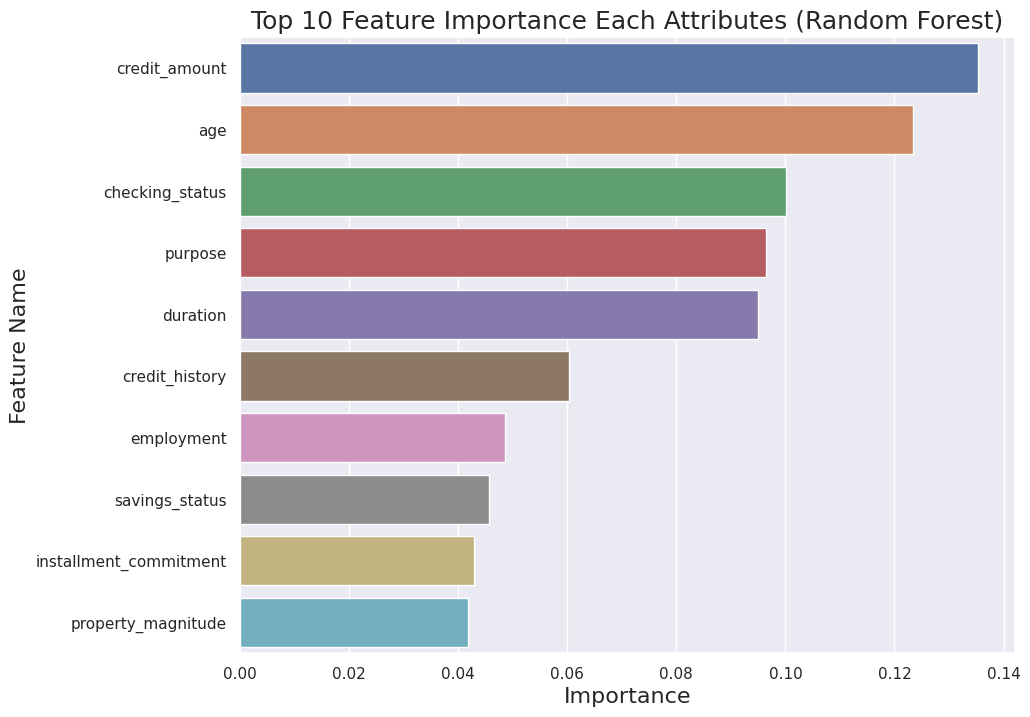

In [81]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

### Finaly The ROC curve have confirmed that the random forest is the best model,it's curve is the clostest should to the top left corner of the plot compared to the other models.